# Logistic Regression
This notebook summarize some common use method in scikit-learn for **logistic regression**, and shows how to use some key parameters of them.

## Main Classes
Main classes for logistic regression are **LogisticRegression** and **LogisticRegressionCV**. 

The main difference between **LogisticRegression** and **LogisticRegressionCV** is that LogisticRegressionCV uses **cross-validation** to choose the **regularization coefficient C**. And LogisticRegression needs to specify a regularization coefficient each time. LogisticRegression and LogisticRegressionCV are basically the same except for cross-validation and the choice of the regularization coefficient C.

Following content is mainly focusing on parameters of both class. 
> These parameters have same usage in both class

## Initilize Data

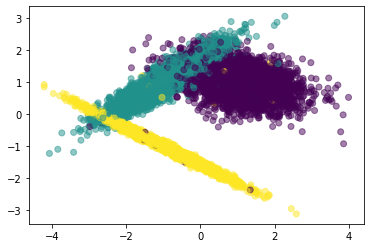

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
%matplotlib inline

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=3)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, c=y)
plt.show()

## Penalty: Specify the norm of the penalty
LogisticRegression and LogisticRegressionCV come with a regularization term by default. The optional values of the penalty parameter are **"l1", "l2" and "elasticnet"(or None)**. They correspond to **L1 regularization**, **L2 regularization** and **both L1 and L2 penalty** respectively. The default is L2 regularization.

The choice of **penalty** affects the choice of our loss function optimization algorithm. That is, the choice of the parameter **solver**. If it is **L2 regularization**, then 4 optional algorithms **{'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}** can be selected. But if penalty is **L1 regularization**, you can only choose **'liblinear' and 'saga'**. This is because the loss function of L1 regularization is not continuously derivable, and the three optimization algorithms {'newton-cg', 'lbfgs', 'sag'} all require the first-order or second-order continuous derivative of the loss function. And 'liblinear' does not have this dependency. 'saga' supports all peanlty.

## Solver: loss function optimization algorithm
The solver parameter determines our optimization method for the logistic regression loss function. There are 4 algorithms to choose from, namely:
1. **liblinear**: using `libnear` library to realize. Internally, the **axis descent method** is used to iteratively optimize the loss function.
1. **lbfgs**: A kind of **Quasi-Newton method**. The loss function is iteratively optimized by using the second derivative matrix(the Hessian matrix) of the loss function.
1. **newton-cg**: A kind of **Newton method**. Optimization methd is similar to **lbfgs**.
1. **sag**: Known as **Stochastic Average Gradient Descent**.
1. **saga**: Support all Penalty.

**sag** only part of the samples to optimize loss function, so it is not suiable for small sample project. If the sample is large enough, says 100 thousands, then **sag** is recommended. 

**liblinear** also has its limitation. For **multinomial logistic regression**, there are two common ones: **one-vs-rest (OvR) and many-vs-many (MvM)**. MvM is generally more accurate than OvR classification. However, **liblinear only supports OvR, not MvM**, so if we need relatively accurate multinomial logistic regression, we cannot choose liblinear. It also means that if we need relatively accurate multinomial logistic regression, L1 regularization cannot be used.

## multi_class: classification method
There are three options for this parameter:
1. **ovr**: Known as one-vs-rest(OvR). If the option chosen is ‘ovr’, then a binary problem is fit for each label.
1. **multinomial**: Known as many-vs-many(MvM). For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. 
> 'multinomial' is unavailable when solver=’liblinear’.
1. **auto**: 'auto' selects 'ovr' if the data is binary, or if solver='liblinear', and otherwise selects 'multinomial'.

## class_weight: Weight for different class
default None. you can choose `balanced` to let the library calculate the weight by itself, or we can input the weight of each type by ourselves. For example, for the binary model of 0,1, we can define `class_weight={0:0.9, 1:0.1}`, This way type **0** has a weight of 90% and type **1** has a weight of 10%.

This parameter focuses on the following problems in classification:
* **Costly Misclassification**: For example, classifying **legitimate users and illegal users**, classifying illegal users as legitimate users is **costly**. We would rather classify legitimate users as illegal users, which can then be manually screened, but we are reluctant to classify illegal users as legitimate users. At this time, we can **appropriately increase the weight of illegal users**.
* **Highly imbalanced sample**: For example, we have 10,000 binary sample data of legal users and illegal users, of which there are **9,995 legal users and only 5 illegal users**. If we do not consider the weight, we can predict all the test sets as legal users, so that The prediction accuracy is theoretically 99.95%, but it doesn't make any sense. At this time, we can choose `balanced` to let the class library automatically increase the weight of illegal user samples.
> If we run into imbalanced sample problem, we can also set `sample_weight` parameter when we use `fit` method.
> if `sample_weight` and `class_weight` are both used, the final weight is calculated as *sample_wight x class_weight*.

## Code Example

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, X_test.shape)

# default params
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc = round(logreg.score(X_test, y_test) * 100, 2)
acc

(7500, 2) (2500, 2)


91.8

In [3]:
# using sag and l2 regulization
logreg = LogisticRegression(solver='sag')
logreg.fit(X_train, y_train)
acc = round(logreg.score(X_test, y_test) * 100, 2)
acc

91.8

In [4]:
# using libnear and l1 regulization
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(X_train, y_train)
acc = round(logreg.score(X_test, y_test) * 100, 2)
acc

91.68

In [5]:
# using saga and l1 regulization, wiht MvM
logreg = LogisticRegression(solver='saga', penalty='l1', multi_class='multinomial')
logreg.fit(X_train, y_train)
acc = round(logreg.score(X_test, y_test) * 100, 2)
acc

91.8